In [12]:
import numpy as np
import networkx as nx
from deap import base, creator, tools, algorithms
import random
import folium
import itertools

# Define the coordinates of the hotspots (including the police station)
hotspots = [
    (1.429497255050177, 103.84020473651532),  # Police station coordinates
    (1.4330621251437414, 103.83778167687922),  # Yishun coordinates
    (1.4371190344748281, 103.83539436698997),
    (1.4252566436379683, 103.83590935114745),
    (1.4248276228794505, 103.84286163671058)
]

# Create a graph where nodes are hotspots and edges are Euclidean distances between them
G = nx.complete_graph(len(hotspots))
for i, coord1 in enumerate(hotspots):
    for j, coord2 in enumerate(hotspots):
        if i != j:
            distance = np.linalg.norm(np.array(coord1) - np.array(coord2))
            G[i][j]['weight'] = distance

# Check if the graph is created correctly
print("Graph Nodes:", G.nodes)
print("Graph Edges:", G.edges(data=True))

# Create a Folium map displaying the hotspots in Yishun Neighburhood
map_center = hotspots[0]
mymap = folium.Map(location=map_center, zoom_start=13)

# Add crime hotspots to the map as markers
for i, coord in enumerate(hotspots):
    folium.Marker(location=coord, popup=f"Hotspot {i+1}").add_to(mymap)

# Save or display the map
mymap.save('graph_map.html')
mymap

# Determine the starting point (police station)
starting_point = 0

# Genetic Algorithm setup
population_size = 100

# Define the fitness function
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("PatrolPolice", list, fitness=creator.FitnessMin)

# Define the evaluation function
def eval_route(patrol_police):
    distance = 0
    for i in range(len(patrol_police) - 1):
        distance += G[patrol_police[i]][patrol_police[i + 1]]['weight']
    distance += G[patrol_police[-1]][patrol_police[0]]['weight']
    return distance,

# Genetic Algorithm setup
toolbox = base.Toolbox()
toolbox.register("indices", itertools.permutations, range(1, len(hotspots)))
toolbox.register("patrol_police", lambda: [starting_point] + random.sample(range(1, len(hotspots)), len(hotspots) - 1))
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", eval_route)

# Create an initial population
population = [creator.PatrolPolice(toolbox.patrol_police()) for _ in range(population_size)]

# Evaluate the fitness of initial population
fitnesses = list(map(toolbox.evaluate, population))
for ind, fit in zip(population, fitnesses):
    ind.fitness.values = fit
    print("Initial individual:", ind)  # Debug print
    print("Fitness:", fit)  # Debug print

print("Number of hotspots:", len(hotspots))  # Debug print
print("Number of nodes in the graph:", len(G.nodes))  # Debug print

# Evolve the population
algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=50, verbose=False)

# Get the best route
best_patrol_police = tools.selBest(population, k=1)[0]  
best_route = [hotspots[i] for i in best_patrol_police]

# Visualize the optimal route with annotations
map_center = [np.mean([coord[0] for coord in hotspots]), np.mean([coord[1] for coord in hotspots])]
mymap = folium.Map(location=map_center, zoom_start=13)

# Add crime hotspots to the map
for i, coord in enumerate(hotspots):
    folium.CircleMarker(location=coord, radius=5, color='red').add_to(mymap)
    folium.Marker(location=coord, icon=folium.Icon(color='green'), popup=f"Hotspot {i+1}").add_to(mymap)  # Add hotspot numbers

# Add the optimal patrol route to the map with annotations
for i in range(len(best_route)):
    coord = best_route[i]
    annotation = '1' if i == 0 else str(i + 1)  # Annotate starting point as '1', others accordingly
    folium.Marker(location=coord, icon=folium.DivIcon(html=f"<div style='font-size: large;'>{annotation}</div>")).add_to(mymap)  # Add visit numbers
    if i < len(best_route) - 1:
        next_coord = best_route[i + 1]
        folium.PolyLine(locations=[coord, next_coord], color='blue', weight=2.5, opacity=1).add_to(mymap)

# Connect the last hotspot to the starting point
folium.PolyLine(locations=[best_route[-1], best_route[0]], color='blue', weight=2.5, opacity=1).add_to(mymap)

# Save or display the map
mymap.save('optimal_patrol_route_with_annotations.html')
mymap


Graph Nodes: [0, 1, 2, 3, 4]
Graph Edges: [(0, 1, {'weight': 0.004310396360439602}), (0, 2, {'weight': 0.009012833992058149}), (0, 3, {'weight': 0.006035985471143113}), (0, 4, {'weight': 0.005372576966174478}), (1, 2, {'weight': 0.004707203185325589}), (1, 3, {'weight': 0.008026901343781687}), (1, 4, {'weight': 0.009675382133480553}), (2, 3, {'weight': 0.011873564125773988}), (2, 4, {'weight': 0.014381895427490602}), (3, 4, {'weight': 0.006965510272948608})]
Initial individual: [0, 3, 1, 2, 4]
Fitness: (0.03852456239391547,)
Initial individual: [0, 2, 3, 1, 4]
Fitness: (0.043961258561268854,)
Initial individual: [0, 2, 4, 3, 1]
Fitness: (0.04269753739671865,)
Initial individual: [0, 3, 1, 4, 2]
Fitness: (0.04713299836795411,)
Initial individual: [0, 4, 2, 1, 3]
Fitness: (0.03852456239391547,)
Initial individual: [0, 1, 2, 4, 3]
Fitness: (0.036400990717347516,)
Initial individual: [0, 3, 1, 4, 2]
Fitness: (0.04713299836795411,)
Initial individual: [0, 1, 2, 3, 4]
Fitness: (0.03322925091

### Import Essential Libraries 

In [20]:
import numpy as np
import networkx as nx
from deap import base, creator, tools, algorithms
import random
import folium
import itertools

### Create Graph 

#### Hotspots are nodes of the graph and weights are assigned to each node based on real distance between hotspots and police station.

We have decided to develop an algorithm based on a particular neighbourhood, Yishun. 

In [21]:
# Define the coordinates of the hotspots (including the police station)
hotspots = [
    (1.429497255050177, 103.84020473651532),  # Police station coordinates
    (1.4330621251437414, 103.83778167687922),  # Yishun coordinates
    (1.4371190344748281, 103.83539436698997),
    (1.4252566436379683, 103.83590935114745),
    (1.4248276228794505, 103.84286163671058)
]

# Create a graph where nodes are hotspots and edges are Euclidean distances between them
G = nx.complete_graph(len(hotspots))
for i, coord1 in enumerate(hotspots):
    for j, coord2 in enumerate(hotspots):
        if i != j:
            distance = np.linalg.norm(np.array(coord1) - np.array(coord2))
            G[i][j]['weight'] = distance

# Check if the graph is created correctly
print("Graph Nodes:", G.nodes)
print("Graph Edges:", G.edges(data=True))

Graph Nodes: [0, 1, 2, 3, 4]
Graph Edges: [(0, 1, {'weight': 0.004310396360439602}), (0, 2, {'weight': 0.009012833992058149}), (0, 3, {'weight': 0.006035985471143113}), (0, 4, {'weight': 0.005372576966174478}), (1, 2, {'weight': 0.004707203185325589}), (1, 3, {'weight': 0.008026901343781687}), (1, 4, {'weight': 0.009675382133480553}), (2, 3, {'weight': 0.011873564125773988}), (2, 4, {'weight': 0.014381895427490602}), (3, 4, {'weight': 0.006965510272948608})]


### Visualising hotspots of Yishun Neighbourhood at a glance

In [22]:
# Create a Folium map displaying the hotspots in Yishun Neighburhood
map_center = hotspots[0]
mymap = folium.Map(location=map_center, zoom_start=13)

# Add crime hotspots to the map as markers
for i, coord in enumerate(hotspots):
    folium.Marker(location=coord, popup=f"Hotspot {i+1}").add_to(mymap)

# Save or display the map
mymap.save('graph_map.html')
mymap


### Set up Genetic Algorithm

In [16]:
# Determine the starting point (police station)
starting_point = 0

# Genetic Algorithm setup
population_size = 100

# Define the fitness function
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("PatrolPolice", list, fitness=creator.FitnessMin)

# Define the evaluation function
def eval_route(patrol_police):
    distance = 0
    for i in range(len(patrol_police) - 1):
        distance += G[patrol_police[i]][patrol_police[i + 1]]['weight']
    distance += G[patrol_police[-1]][patrol_police[0]]['weight']
    return distance,

# Genetic Algorithm setup
toolbox = base.Toolbox()
toolbox.register("indices", itertools.permutations, range(1, len(hotspots)))
toolbox.register("patrol_police", lambda: [starting_point] + random.sample(range(1, len(hotspots)), len(hotspots) - 1))
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", eval_route)

# Create an initial population
population = [creator.PatrolPolice(toolbox.patrol_police()) for _ in range(population_size)]

# Evaluate the fitness of initial population
fitnesses = list(map(toolbox.evaluate, population))
for ind, fit in zip(population, fitnesses):
    ind.fitness.values = fit
    print("Initial individual:", ind)  # Debug print
    print("Fitness:", fit)  # Debug print

# Ensure graph is correct
print("Number of hotspots:", len(hotspots))  
print("Number of nodes in the graph:", len(G.nodes)) 


Initial individual: [0, 2, 1, 4, 3]
Fitness: (0.03639691505495601,)
Initial individual: [0, 1, 3, 4, 2]
Fitness: (0.04269753739671865,)
Initial individual: [0, 4, 3, 1, 2]
Fitness: (0.03408502576028851,)
Initial individual: [0, 4, 3, 1, 2]
Fitness: (0.03408502576028851,)
Initial individual: [0, 3, 4, 2, 1]
Fitness: (0.036400990717347516,)
Initial individual: [0, 1, 2, 4, 3]
Fitness: (0.036400990717347516,)
Initial individual: [0, 1, 3, 2, 4]
Fitness: (0.043965334223660356,)
Initial individual: [0, 2, 1, 3, 4]
Fitness: (0.03408502576028851,)
Initial individual: [0, 1, 2, 4, 3]
Fitness: (0.036400990717347516,)
Initial individual: [0, 1, 2, 3, 4]
Fitness: (0.03322925091066226,)
Initial individual: [0, 3, 1, 2, 4]
Fitness: (0.03852456239391547,)
Initial individual: [0, 2, 4, 3, 1]
Fitness: (0.04269753739671865,)
Initial individual: [0, 4, 2, 1, 3]
Fitness: (0.03852456239391547,)
Initial individual: [0, 3, 2, 1, 4]
Fitness: (0.037664711881897725,)
Initial individual: [0, 1, 4, 2, 3]
Fitness

In [23]:
# Evolve the population
algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=50, verbose=False)

# Get the best route
best_patrol_police = tools.selBest(population, k=1)[0]  
best_route = [hotspots[i] for i in best_patrol_police]


### Visualising Optimal Route 

In [24]:
# Visualize the optimal route with annotations
map_center = [np.mean([coord[0] for coord in hotspots]), np.mean([coord[1] for coord in hotspots])]
mymap = folium.Map(location=map_center, zoom_start=13)

# Add crime hotspots to the map
for i, coord in enumerate(hotspots):
    folium.CircleMarker(location=coord, radius=5, color='red').add_to(mymap)
    folium.Marker(location=coord, icon=folium.Icon(color='green'), popup=f"Hotspot {i+1}").add_to(mymap)  # Add hotspot numbers

# Add the optimal patrol route to the map with annotations
for i in range(len(best_route)):
    coord = best_route[i]
    annotation = '1' if i == 0 else str(i + 1)  # Annotate starting point as '1', others accordingly
    folium.Marker(location=coord, icon=folium.DivIcon(html=f"<div style='font-size: large;'>{annotation}</div>")).add_to(mymap)  # Add visit numbers
    if i < len(best_route) - 1:
        next_coord = best_route[i + 1]
        folium.PolyLine(locations=[coord, next_coord], color='blue', weight=2.5, opacity=1).add_to(mymap)

# Connect the last hotspot to the starting point
folium.PolyLine(locations=[best_route[-1], best_route[0]], color='blue', weight=2.5, opacity=1).add_to(mymap)

# Save or display the map
mymap.save('optimal_patrol_route_with_annotations.html')
mymap

### Create a static map using Matplotlib instead of interactive map using Folium (unavailable for view on Github)

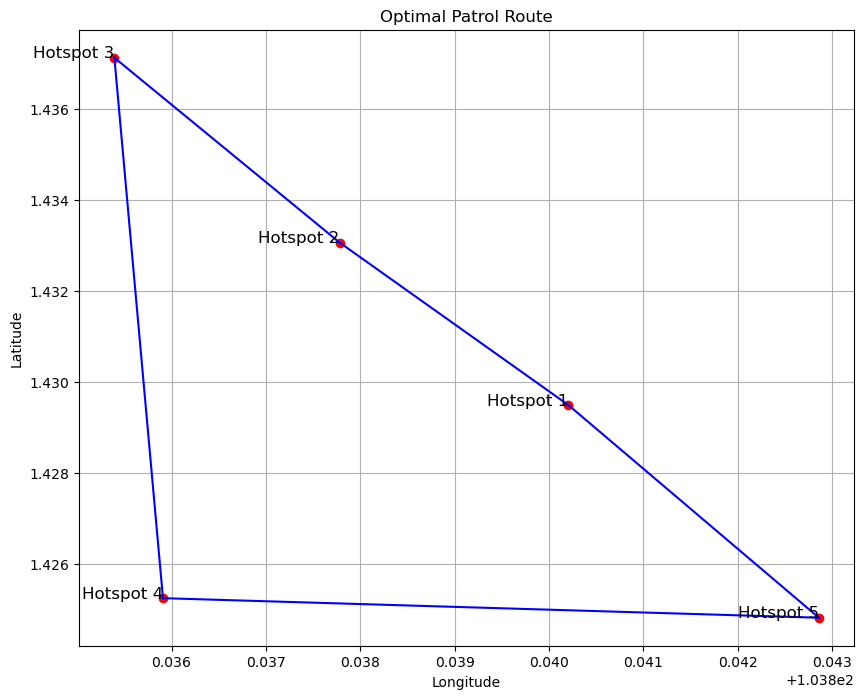

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.title("Optimal Patrol Route")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Plot hotspots
for i, coord in enumerate(hotspots):
    plt.plot(coord[1], coord[0], 'ro')  # Red dot for hotspots
    plt.text(coord[1], coord[0], f"Hotspot {i+1}", fontsize=12, ha='right')

# Plot the optimal patrol route
for i in range(len(best_route) - 1):
    plt.plot([best_route[i][1], best_route[i + 1][1]], [best_route[i][0], best_route[i + 1][0]], 'b-')  # Blue line for route

# Connect the last hotspot to the starting point
plt.plot([best_route[-1][1], best_route[0][1]], [best_route[-1][0], best_route[0][0]], 'b-')  # Blue line for route

plt.grid(True)
plt.show()